In [1]:
%pip install pandas matplotlib numpy seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from shutil import rmtree


In [3]:
csv_file = "./dataset/train.csv"
test_csv_file = "./dataset/test.csv"
train_data = pd.read_csv(csv_file)
test_data = pd.read_csv(test_csv_file)
print(train_data.shape)
print( train_data.columns)
print(train_data.info())
print(train_data.isnull().sum().sort_values(ascending=False))
print(train_data.head())

(159256, 24)
Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-nu

# Feature Engineering

In [4]:
def process(df):
    df["BMI"] = df["weight(kg)"] / ((df["height(cm)"] / 100) ** 2)
    df["HW_Ratio"] = df["height(cm)"] / df["waist(cm)"]
    df["HA_Ratio"] = df["height(cm)"] / df["age"]
    return df
train_data = process(train_data)
test_data = process(test_data)

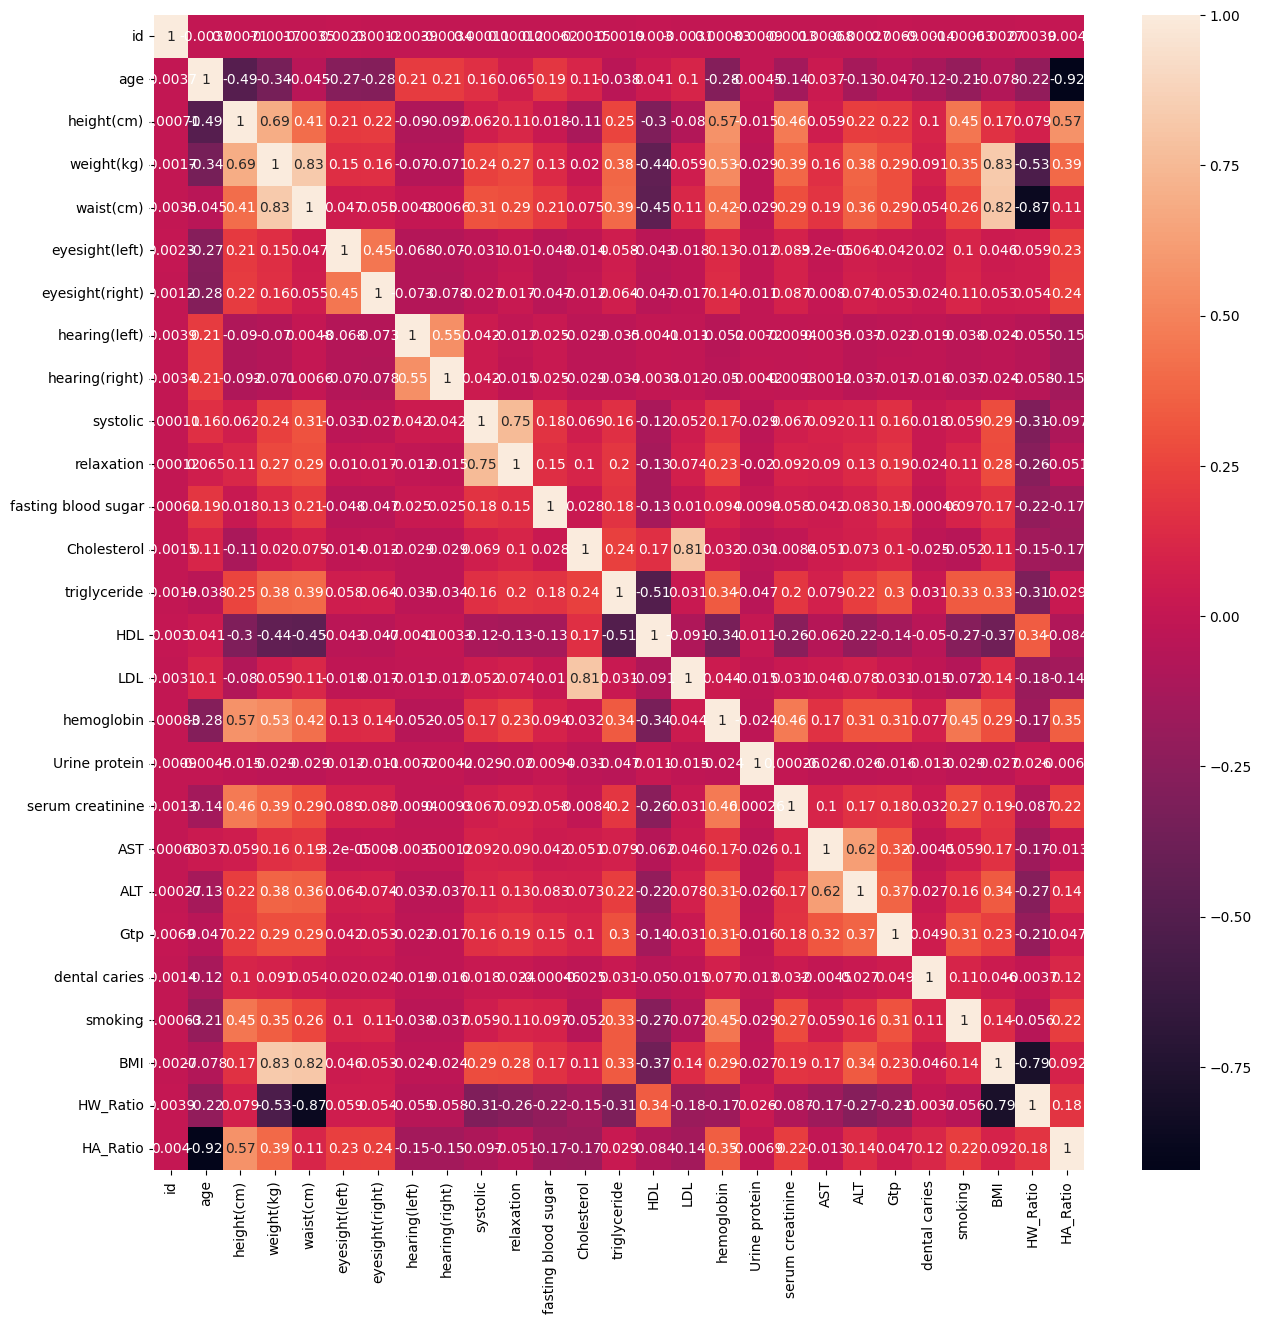

In [5]:
corr = train_data.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True) 
plt.savefig("dataCorr.png",bbox_inches='tight')

In [6]:
correlation_matrix = train_data.corr()
target_correlation = correlation_matrix['smoking'].abs()

# Sort by absolute correlation in descending order
sorted_correlation = target_correlation.sort_values(ascending=False)
print(sorted_correlation)

smoking                1.000000
hemoglobin             0.450679
height(cm)             0.447111
weight(kg)             0.351748
triglyceride           0.331975
Gtp                    0.305561
serum creatinine       0.272979
HDL                    0.271186
waist(cm)              0.262715
HA_Ratio               0.224441
age                    0.206033
ALT                    0.163016
BMI                    0.141723
eyesight(right)        0.109781
relaxation             0.109501
dental caries          0.106636
eyesight(left)         0.100420
fasting blood sugar    0.096534
LDL                    0.072285
AST                    0.059394
systolic               0.058642
HW_Ratio               0.056072
Cholesterol            0.051896
hearing(left)          0.038219
hearing(right)         0.036858
Urine protein          0.028548
id                     0.000632
Name: smoking, dtype: float64


In [7]:
relevant_features = target_correlation[target_correlation>0.1] # highly correlated features 

names = [index for index, value in relevant_features.items()] # getting the names of the features 

print(names) # printing the features 
print(len(names))

['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'relaxation', 'triglyceride', 'HDL', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp', 'dental caries', 'smoking', 'BMI', 'HA_Ratio']
17


In [8]:
temp_data = train_data.copy()
processed_train_data = train_data[names]
names.remove('smoking')
idColum = test_data["id"]
processed_test_data = test_data[names]

processed_train_data.describe()



,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),relaxation,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,dental caries,smoking,BMI,HA_Ratio
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,76.874071,127.616046,55.852684,14.796965,0.892764,26.550296,36.216004,0.197996,0.437365,24.452825,4.064915
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,8.994642,66.188989,13.964141,1.431213,0.179346,17.753070,31.204643,0.398490,0.496063,3.368651,1.358988
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,44.000000,8.000000,9.000000,4.900000,0.100000,1.000000,2.000000,0.000000,0.000000,11.718750,1.687500
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,70.000000,77.000000,45.000000,13.800000,0.800000,16.000000,18.000000,0.000000,0.000000,22.222222,3.090909
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,78.000000,115.000000,54.000000,15.000000,0.900000,22.000000,27.000000,0.000000,0.000000,24.221453,3.875000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,82.000000,165.000000,64.000000,15.800000,1.000000,32.000000,44.000000,0.000000,1.000000,26.159334,4.500000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,133.000000,766.000000,136.000000,21.000000,9.900000,2914.000000,999.000000,1.000000,1.000000,45.785640,9.500000


In [9]:
processed_test_data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),relaxation,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,dental caries,BMI,HA_Ratio
count,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000
mean,44.426538,165.221322,67.125618,82.999892,1.004776,0.999483,76.820676,127.406203,55.922286,14.793354,0.892463,26.565427,36.086888,0.195458,24.458544,4.055112
std,11.897138,8.837065,12.586569,8.946584,0.397690,0.385752,9.018782,66.352488,14.000552,1.434296,0.179927,17.944195,30.928138,0.396555,3.361906,1.362386
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,40.000000,8.000000,18.000000,5.000000,0.100000,1.000000,2.000000,0.000000,10.380623,1.705882
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,70.000000,77.000000,45.000000,13.800000,0.800000,16.000000,18.000000,0.000000,22.222222,3.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,78.000000,114.000000,54.000000,15.000000,0.900000,22.000000,27.000000,0.000000,24.221453,3.875000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,82.000000,164.000000,64.000000,15.800000,1.000000,33.000000,44.000000,0.000000,26.159334,4.500000
max,85.000000,190.000000,130.000000,127.700000,9.900000,9.900000,140.000000,548.000000,148.000000,21.100000,9.900000,2914.000000,999.000000,1.000000,48.888889,9.250000


In [10]:
def normalize(df):
    return df/df.max()
processed_train_data = normalize(processed_train_data)
processed_test_data = normalize(processed_test_data)
processed_test_data["id"] = idColum

In [11]:
processedDataDirectoryPath = "processedData"
trainCSVPath = os.path.join(processedDataDirectoryPath,'processed_train_data.csv')
testCSVPath = os.path.join(processedDataDirectoryPath,'processed_test_data.csv')
if os.path.isdir(processedDataDirectoryPath):
    rmtree(processedDataDirectoryPath)
os.mkdir(processedDataDirectoryPath)
processed_train_data.to_csv(trainCSVPath, index=False)
processed_test_data.to_csv(testCSVPath, index=False)